# Decision tree 

## Data Set : weather.csv

### Columns : outlook , temp , humidity , windy .    prediction : play 

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [81]:
data = pd.read_csv(r'C:\Users\mca\py_lab_064\ML_064\week9 KNN NB DT\DT\weather.csv')
data.head()

outlook  temp humidity  windy play
0     sunny   hot     high  False   no
1     sunny   hot     high   True   no
2  overcast   hot     high  False  yes
3     rainy  mild     high  False  yes
4     rainy  cool   normal  False  yes

In [82]:
#displaying info of data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   windy     14 non-null     bool  
 4   play      14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [83]:
#checking for null values
data.isnull().sum()

outlook     0
temp        0
humidity    0
windy       0
play        0
dtype: int64

In [84]:
target_column = 'play'
feature_columns = [col for col in data.columns if col != target_column]
X = data[feature_columns]
y = data[target_column]

In [85]:
X = pd.DataFrame(X, columns=feature_columns)

In [86]:
categorical_columns = [col for col in X.columns if X[col].dtype == 'object']
if categorical_columns:
    label_encoders = {}
    for col in categorical_columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le

In [87]:
splits =  [2,3,4,5,6,7,8,9] 
random_states = [0, 42]

In [99]:
result = []
for split_size in splits:
    split_size = split_size / 10
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_size, random_state=random_state , shuffle=True)
        clf = DecisionTreeClassifier()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        result.append(["DT","weather", split_size, random_state, accuracy])

result = pd.DataFrame(result, columns=["Model","Data_SET","train-test-split","Random_State","accuracy_score"])

In [96]:
result

Model Data_SET  train-test-split  Random_State  accuracy_score
0     DT  weather               0.2             0        0.333333
1     DT  weather               0.2            42        1.000000
2     DT  weather               0.3             0        0.200000
3     DT  weather               0.3            42        0.600000
4     DT  weather               0.4             0        0.666667
5     DT  weather               0.4            42        0.666667
6     DT  weather               0.5             0        0.571429
7     DT  weather               0.5            42        0.714286
8     DT  weather               0.6             0        0.555556
9     DT  weather               0.6            42        0.777778
10    DT  weather               0.7             0        0.600000
11    DT  weather               0.7            42        0.800000
12    DT  weather               0.8             0        0.416667
13    DT  weather               0.8            42        0.583333
14    DT  weather               0.9             0        0.615385
15    DT  weather               0.9            42        0.615385

In [100]:
# On Best Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
ac = accuracy_score(y_test, y_pred)
ac

1.0

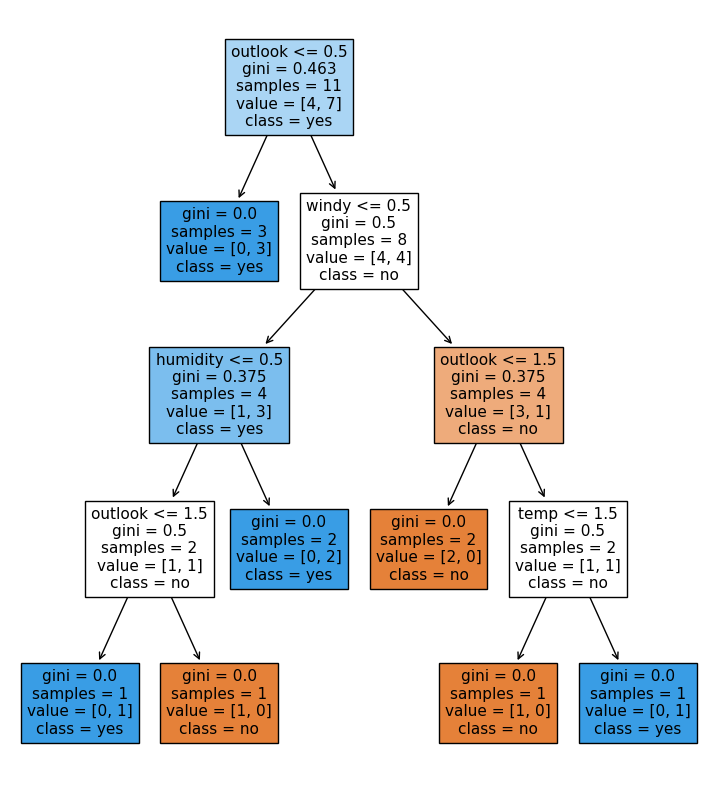

In [107]:
class_names = list(data[target_column].unique())
plt.figure(figsize=(9, 10))
plot_tree(clf, filled=True, feature_names=feature_columns, class_names=class_names)
plt.show()

In [108]:
data.columns

Index(['outlook', 'temp', 'humidity', 'windy', 'play'], dtype='object')

In [109]:
tree.export_graphviz(clf, out_file='weather_tree1.dot', feature_names=['outlook', 'temp', 'humidity', 'windy'])

In [105]:
# Exporting to excel sheet 
result.to_excel("DT_weather_064.xlsx")